In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
#Check for nulls
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#check for class value counts
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Distribution of Classes

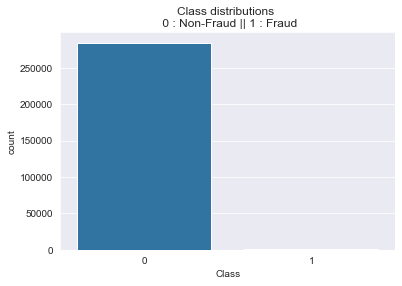

In [6]:
sns.countplot(x = df['Class'], data = df)
plt.title("Class distributions \n 0 : Non-Fraud || 1 : Fraud")
plt.show()

Clearly the dataset is a highly imbalanced dataset

### Distribution Of Amount and time

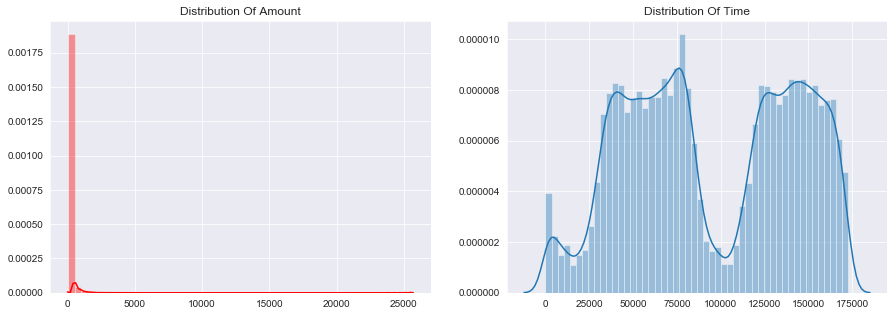

In [7]:
amount = df['Amount'].values
time = df['Time'].values

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.distplot(amount, ax=ax[0], color='r')
ax[0].set_title("Distribution Of Amount")

sns.distplot(time, ax=ax[1])
ax[1].set_title("Distribution Of Time")

plt.show()

From the above distribution, we observed that Amount and Time features are skewed.

### Feature Scaling

Time and Amount need to be scaled like the other features

In [8]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960


In [10]:
df.drop(columns=['Time', 'Amount'], axis=1, inplace=True)

In [11]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


## Splitting the data (Original DataFrame)

for highly imbalanced dataset, we generally, split the data using stratified k-fold split so that we have uniform distribution of classes in each fold.

In [12]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(shuffle=True, random_state=0)
X = df.drop('Class', axis = 1)
y = df['Class']

for train_index, test_index in skfold.split(X, y):
    print("train index: {} \t test index: {}".format(train_index, test_index))
    orig_Xtrain, orig_Xtest = X.iloc[train_index], X.iloc[test_index]
    orig_ytrain, orig_ytest = y.iloc[train_index], y.iloc[test_index]

train index: [     0      1      3 ... 284804 284805 284806] 	 test index: [     2     20     24 ... 284791 284793 284798]
train index: [     0      1      2 ... 284804 284805 284806] 	 test index: [     3      9     13 ... 284794 284799 284803]
train index: [     0      1      2 ... 284801 284802 284803] 	 test index: [    11     12     16 ... 284804 284805 284806]
train index: [     0      2      3 ... 284804 284805 284806] 	 test index: [     1      4      6 ... 284796 284801 284802]
train index: [     1      2      3 ... 284804 284805 284806] 	 test index: [     0      5      7 ... 284782 284790 284795]


In [13]:
print(orig_Xtrain.shape)
print(orig_Xtest.shape)
print(orig_ytrain.shape)
print(orig_ytest.shape)

(227846, 30)
(56961, 30)
(227846,)
(56961,)


In [14]:
orig_ytest.value_counts()

0    56863
1       98
Name: Class, dtype: int64

In [15]:
orig_ytrain.value_counts()

0    227452
1       394
Name: Class, dtype: int64

In [16]:
type(orig_Xtrain)

pandas.core.frame.DataFrame

In [17]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
orig_ytrain_df = pd.DataFrame(orig_ytrain, columns=['Class'])
orig_ytrain_df.head()

,Class
1,0
2,0
3,0
4,0
6,0


In [19]:
#features = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21',
 #           'V22','V23','V24','V25', 'V26', 'V27', 'V28', 'scaled_amount', 'scaled_time', 'Class']
new_df = pd.concat([orig_Xtrain, orig_ytrain_df], ignore_index=True, axis=1)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937,0


In [20]:
orig_Xtrain.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount',
       'scaled_time'],
      dtype='object')

In [21]:
new_df.rename(columns={0: 'V1', 1: 'V2', 2: 'V3', 3: 'V4', 4: 'V5', 5: 'V6', 6: 'V7', 7: 'V8', 
                      8: 'V9', 9: 'V10', 10: 'V11', 11: 'V12', 12: 'V13', 13: 'V14', 14: 'V15', 15: 'V16', 
                      16: 'V17', 17: 'V18', 18: 'V19', 19: 'V20', 20: 'V21', 21: 'V22', 22: 'V23', 23: 'V24', 
                      24: 'V25', 25: 'V26', 26: 'V27', 27: 'V28', 28: 'scaled_amount', 29: 'scaled_time', 30: 'Class'}, inplace=True)
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937,0


## Random Undersampling

"Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

In [22]:
new_df['Class'].value_counts()

0    227452
1       394
Name: Class, dtype: int64

In [23]:
new_df = new_df.sample(frac=1) #Random sampling of data
fraud = new_df[new_df['Class'] == 1]
non_fraud = new_df[new_df['Class'] == 0][:394] #Since there are 394 fraud cases

normal_df = pd.concat([fraud, non_fraud], ignore_index=True)
normal_df = normal_df.sample(frac=1)

In [24]:
normal_df['Class'].value_counts()

1    394
0    394
Name: Class, dtype: int64

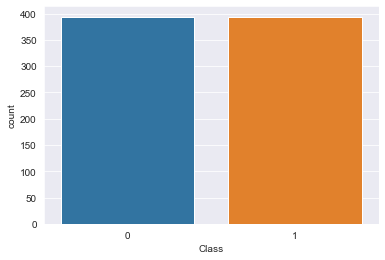

In [25]:
sns.countplot(x='Class', data=normal_df)
plt.show()

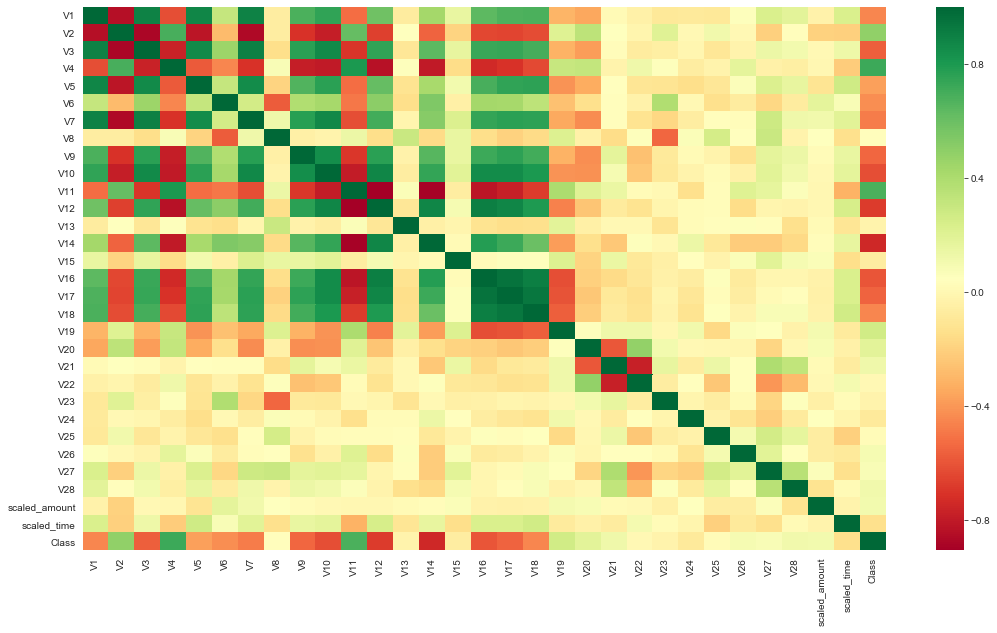

In [26]:
#lets check the correlation between the features
plt.figure(figsize=(18, 10))
sns.heatmap(normal_df.corr(), cmap='RdYlGn')

From the above plot, we see that features : V17, V14, V12 and V10 are negatively correlated with the dependent feature, i.e., Class.

Also, features : V19, V11, V4 and V2 are positively correlated with Class

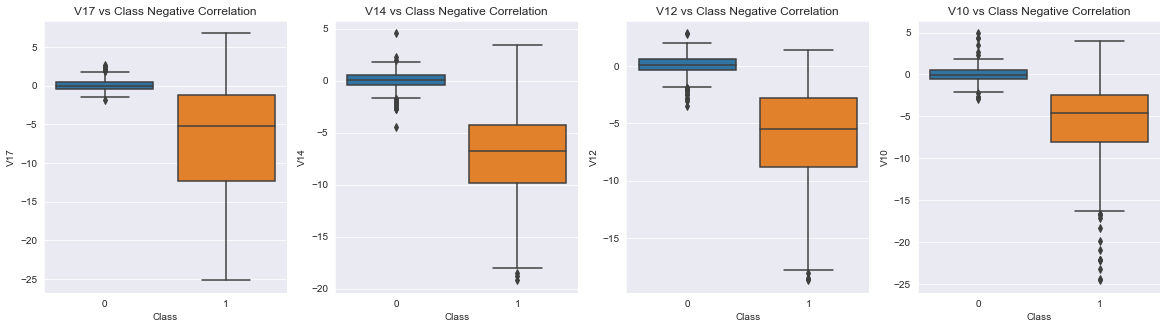

In [27]:
#Let's plot a box plot for the above features

fig, ax = plt.subplots(1, 4, figsize = (20,  5))

sns.boxplot(x='Class', y='V17', data=normal_df, ax=ax[0])
ax[0].set_title("V17 vs Class Negative Correlation")

sns.boxplot(x='Class', y='V14', data=normal_df, ax=ax[1])
ax[1].set_title("V14 vs Class Negative Correlation")

sns.boxplot(x='Class', y='V12', data=normal_df, ax=ax[2])
ax[2].set_title("V12 vs Class Negative Correlation")

sns.boxplot(x='Class', y='V10', data=normal_df, ax=ax[3])
ax[3].set_title("V10 vs Class Negative Correlation")

plt.show()

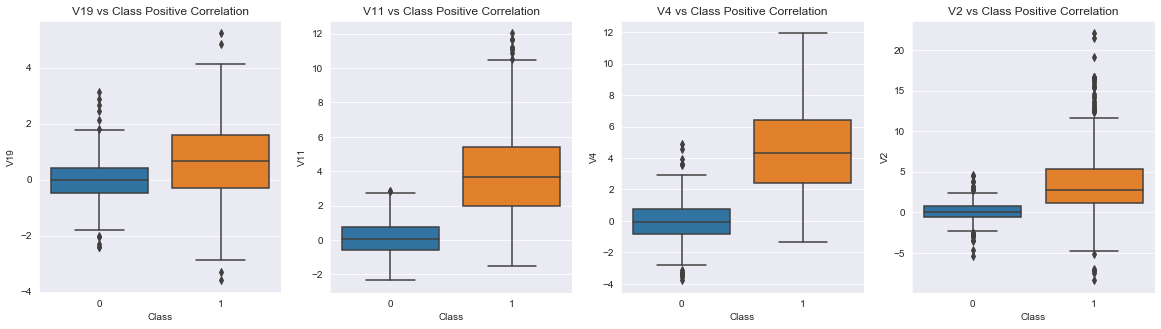

In [28]:
#Let's plot a box plot for the above features

fig, ax = plt.subplots(1, 4, figsize = (20,  5))

sns.boxplot(x='Class', y='V19', data=normal_df, ax=ax[0])
ax[0].set_title("V19 vs Class Positive Correlation")

sns.boxplot(x='Class', y='V11', data=normal_df, ax=ax[1])
ax[1].set_title("V11 vs Class Positive Correlation")

sns.boxplot(x='Class', y='V4', data=normal_df, ax=ax[2])
ax[2].set_title("V4 vs Class Positive Correlation")

sns.boxplot(x='Class', y='V2', data=normal_df, ax=ax[3])
ax[3].set_title("V2 vs Class Positive Correlation")

plt.show()

## Anomaly Detection (Outlier Analysis)

Identifies data points, events, and/or observations that deviate from a dataset’s normal behavior.

Here, our main aim is to remove outliers from the features that have high correlation with the Class, for better results.

### Removing Outliers

Removing outliers from : 

V14, V12, V10 -> highest negative correlation and

V11, V4, V2 -> highest positive correlation

In [29]:
#for negative corr (V14)
V14_fraud = normal_df[normal_df['Class'] == 1]['V14']
q25, q75 = np.percentile(V14_fraud, 25), np.percentile(V14_fraud, 75)
V14_fr_iqr = q75 - q25

V14_fr_thresh = V14_fr_iqr * 1.5
V14_fraud_lower, V14_fraud_upper = q25 - V14_fr_thresh, q75 + V14_fr_thresh

normal_df = normal_df.drop(normal_df[(normal_df['V14'] < V14_fraud_lower) |  (normal_df['V14'] > V14_fraud_upper)].index)


"""V14_non_fraud = normal_df[normal_df['Class'] == 0]['V14']
q25_nfr, q75_nfr = np.percentile(V14_non_fraud, 25), np.percentile(V14_non_fraud, 75)
V14_nfr_iqr = q75_nfr - q25_nfr

V14_nfr_thresh = V14_nfr_iqr * 1.5
V14_non_fraud_lower, V14_non_fraud_upper = q25_nfr - V14_nfr_thresh, q75_nfr + V14_nfr_thresh

normal_df = normal_df.drop(normal_df[(normal_df['V14'] < V14_non_fraud_lower) |  (normal_df['V14'] > V14_non_fraud_upper)].index)"""

"V14_non_fraud = normal_df[normal_df['Class'] == 0]['V14']\nq25_nfr, q75_nfr = np.percentile(V14_non_fraud, 25), np.percentile(V14_non_fraud, 75)\nV14_nfr_iqr = q75_nfr - q25_nfr\n\nV14_nfr_thresh = V14_nfr_iqr * 1.5\nV14_non_fraud_lower, V14_non_fraud_upper = q25_nfr - V14_nfr_thresh, q75_nfr + V14_nfr_thresh\n\nnormal_df = normal_df.drop(normal_df[(normal_df['V14'] < V14_non_fraud_lower) |  (normal_df['V14'] > V14_non_fraud_upper)].index)"

In [30]:
#for negative corr (V12)
V12_fraud = normal_df[normal_df['Class'] == 1]['V12']
q25, q75 = np.percentile(V12_fraud, 25), np.percentile(V12_fraud, 75)
V12_fr_iqr = q75 - q25

V12_fr_thresh = V12_fr_iqr * 1.5
V12_fraud_lower, V12_fraud_upper = q25 - V12_fr_thresh, q75 + V12_fr_thresh

normal_df = normal_df.drop(normal_df[(normal_df['V12'] < V12_fraud_lower) |  (normal_df['V12'] > V12_fraud_upper)].index)


"""V12_non_fraud = normal_df[normal_df['Class'] == 0]['V12']
q25_nfr, q75_nfr = np.percentile(V12_non_fraud, 25), np.percentile(V12_non_fraud, 75)
V12_nfr_iqr = q75_nfr - q25_nfr

V12_nfr_thresh = V12_nfr_iqr * 1.5
V12_non_fraud_lower, V12_non_fraud_upper = q25_nfr - V12_nfr_thresh, q75_nfr + V12_nfr_thresh

normal_df = normal_df.drop(normal_df[(normal_df['V12'] < V12_non_fraud_lower) |  (normal_df['V12'] > V12_non_fraud_upper)].index)"""

"V12_non_fraud = normal_df[normal_df['Class'] == 0]['V12']\nq25_nfr, q75_nfr = np.percentile(V12_non_fraud, 25), np.percentile(V12_non_fraud, 75)\nV12_nfr_iqr = q75_nfr - q25_nfr\n\nV12_nfr_thresh = V12_nfr_iqr * 1.5\nV12_non_fraud_lower, V12_non_fraud_upper = q25_nfr - V12_nfr_thresh, q75_nfr + V12_nfr_thresh\n\nnormal_df = normal_df.drop(normal_df[(normal_df['V12'] < V12_non_fraud_lower) |  (normal_df['V12'] > V12_non_fraud_upper)].index)"

In [31]:
#for negative corr (V10)
V10_fraud = normal_df[normal_df['Class'] == 1]['V10']
q25, q75 = np.percentile(V10_fraud, 25), np.percentile(V10_fraud, 75)
V10_fr_iqr = q75 - q25

V10_fr_thresh = V10_fr_iqr * 1.5
V10_fraud_lower, V10_fraud_upper = q25 - V10_fr_thresh, q75 + V10_fr_thresh

normal_df = normal_df.drop(normal_df[(normal_df['V10'] < V10_fraud_lower) |  (normal_df['V10'] > V10_fraud_upper)].index)


"""V10_non_fraud = normal_df[normal_df['Class'] == 0]['V10']
q25_nfr, q75_nfr = np.percentile(V10_non_fraud, 25), np.percentile(V10_non_fraud, 75)
V10_nfr_iqr = q75_nfr - q25_nfr

V10_nfr_thresh = V10_nfr_iqr * 1.5
V10_non_fraud_lower, V10_non_fraud_upper = q25_nfr - V10_nfr_thresh, q75_nfr + V10_nfr_thresh

normal_df = normal_df.drop(normal_df[(normal_df['V10'] < V10_non_fraud_lower) |  (normal_df['V10'] > V10_non_fraud_upper)].index)"""

"V10_non_fraud = normal_df[normal_df['Class'] == 0]['V10']\nq25_nfr, q75_nfr = np.percentile(V10_non_fraud, 25), np.percentile(V10_non_fraud, 75)\nV10_nfr_iqr = q75_nfr - q25_nfr\n\nV10_nfr_thresh = V10_nfr_iqr * 1.5\nV10_non_fraud_lower, V10_non_fraud_upper = q25_nfr - V10_nfr_thresh, q75_nfr + V10_nfr_thresh\n\nnormal_df = normal_df.drop(normal_df[(normal_df['V10'] < V10_non_fraud_lower) |  (normal_df['V10'] > V10_non_fraud_upper)].index)"

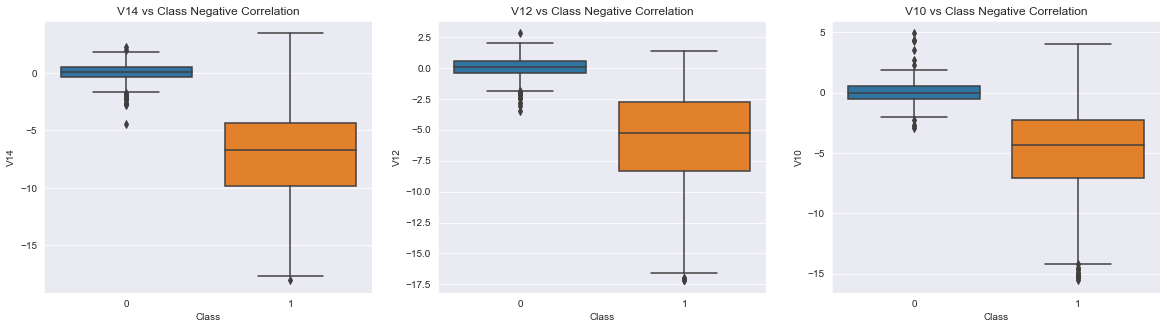

In [32]:
#Let's plot a box plot for the above features

fig, ax = plt.subplots(1, 3, figsize = (20,  5))

sns.boxplot(x='Class', y='V14', data=normal_df, ax=ax[0])
ax[0].set_title("V14 vs Class Negative Correlation")

sns.boxplot(x='Class', y='V12', data=normal_df, ax=ax[1])
ax[1].set_title("V12 vs Class Negative Correlation")

sns.boxplot(x='Class', y='V10', data=normal_df, ax=ax[2])
ax[2].set_title("V10 vs Class Negative Correlation")

plt.show()

In [33]:
#for positive corr (V2)
V2_fraud = normal_df[normal_df['Class'] == 1]['V2']
q25, q75 = np.percentile(V2_fraud, 25), np.percentile(V2_fraud, 75)
V2_fr_iqr = q75 - q25

V2_fr_thresh = V2_fr_iqr * 1.5
V2_fraud_lower, V2_fraud_upper = q25 - V2_fr_thresh, q75 + V2_fr_thresh

normal_df = normal_df.drop(normal_df[(normal_df['V2'] < V2_fraud_lower) |  (normal_df['V2'] > V2_fraud_upper)].index)


"""V2_non_fraud = normal_df[normal_df['Class'] == 0]['V2']
q25_nfr, q75_nfr = np.percentile(V2_non_fraud, 25), np.percentile(V2_non_fraud, 75)
V2_nfr_iqr = q75_nfr - q25_nfr

V2_nfr_thresh = V2_nfr_iqr * 1.5
V2_non_fraud_lower, V2_non_fraud_upper = q25_nfr - V2_nfr_thresh, q75_nfr + V2_nfr_thresh

normal_df = normal_df.drop(normal_df[(normal_df['V2'] < V2_non_fraud_lower) |  (normal_df['V2'] > V2_non_fraud_upper)].index)"""

"V2_non_fraud = normal_df[normal_df['Class'] == 0]['V2']\nq25_nfr, q75_nfr = np.percentile(V2_non_fraud, 25), np.percentile(V2_non_fraud, 75)\nV2_nfr_iqr = q75_nfr - q25_nfr\n\nV2_nfr_thresh = V2_nfr_iqr * 1.5\nV2_non_fraud_lower, V2_non_fraud_upper = q25_nfr - V2_nfr_thresh, q75_nfr + V2_nfr_thresh\n\nnormal_df = normal_df.drop(normal_df[(normal_df['V2'] < V2_non_fraud_lower) |  (normal_df['V2'] > V2_non_fraud_upper)].index)"

Text(0.5, 1.0, 'V2 vs Class Positive Correlation')

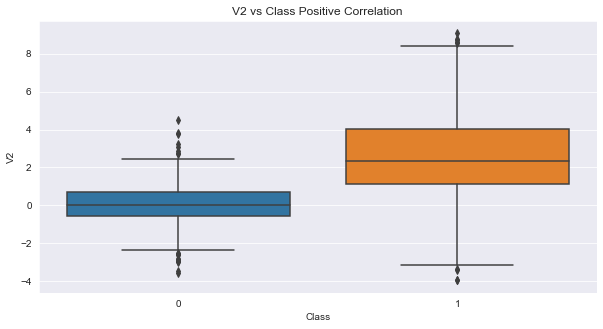

In [34]:
fig, ax = plt.subplots(figsize = (10,  5))

sns.boxplot(x='Class', y='V2', data=normal_df)
plt.title("V2 vs Class Positive Correlation")

#### Some outliers can distort the accuracy of our models but remember, we have to avoid an extreme amount of information loss or else our model runs the risk of underfitting

In [35]:
normal_df.shape

(728, 31)

## Dimensionality Reduction and Clustering

From the dataset description : Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

### t-SNE (t-distributed Stochastic Neighbor Embedding)

In [36]:
from sklearn.manifold import TSNE

In [37]:
X = normal_df.drop('Class', axis=1)
y = normal_df['Class']

X_reduced_tsne = TSNE(n_components=2, random_state=0).fit_transform(X)

In [38]:
X_reduced_tsne #fit_transform method returns the Embedding of the training data in low-dimensional space.
#array of shape(n_smaples, n_components)

array([[  2.9504824 ,   0.27105793],
       [ -4.4396863 ,  12.364377  ],
       [  8.57809   , -46.983376  ],
       ...,
       [-23.788828  , -13.440514  ],
       [-17.586529  ,  16.901747  ],
       [ -7.4250097 ,  -7.3148255 ]], dtype=float32)

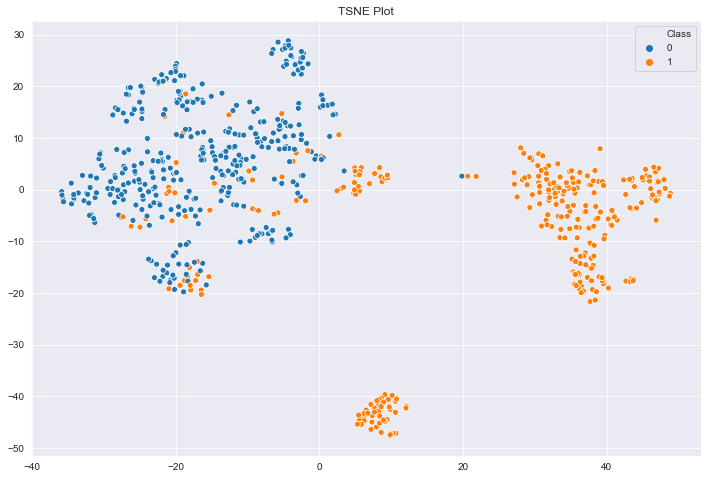

In [39]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x=X_reduced_tsne[:, 0], y=X_reduced_tsne[:, 1], hue=y, legend="full")
plt.title("TSNE Plot")
plt.legend()
plt.show()

## Classifiers(UnderSampling)

In [40]:
X.shape

(728, 30)

In [41]:
X = normal_df.drop('Class', axis=1)
y = normal_df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.25)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(546, 30)
(182, 30)
(546,)
(182,)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

In [44]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "SVM" : SVC(),
    "KNN" : KNeighborsClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier()
}

In [45]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    train_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("The training accuracy score for {} is {}.".format(key, np.mean(train_score)))

The training accuracy score for LogisticRegression is 0.9450375312760635.
The training accuracy score for SVM is 0.9523603002502086.
The training accuracy score for KNN is 0.9413844870725605.
The training accuracy score for DecisionTreeClassifier is 0.9249040867389491.
The training accuracy score for RandomForestClassifier is 0.9486905754795663.


In [46]:
from sklearn.metrics import accuracy_score

In [47]:
for key, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("The testing accuracy score for {} is {}.".format(key, acc))

The testing accuracy score for LogisticRegression is 0.9395604395604396.
The testing accuracy score for SVM is 0.9010989010989011.
The testing accuracy score for KNN is 0.9065934065934066.
The testing accuracy score for DecisionTreeClassifier is 0.8846153846153846.
The testing accuracy score for RandomForestClassifier is 0.9065934065934066.


In [48]:
for key, classifier in classifiers.items():
    y_pred_orig = classifier.predict(orig_Xtest)
    acc_orig = accuracy_score(orig_ytest, y_pred_orig)
    print("The testing accuracy score for {} is {}.".format(key, acc_orig))

The testing accuracy score for LogisticRegression is 0.9634135636663682.
The testing accuracy score for SVM is 0.9719808289882551.
The testing accuracy score for KNN is 0.9766155790804234.
The testing accuracy score for DecisionTreeClassifier is 0.901072663752392.
The testing accuracy score for RandomForestClassifier is 0.9757377855023612.


## SMOTE(Synthetic Minority Oversampling Technique)

SMOTE creates synthetic points fromt he minority class in order to reach an equal balance between the majority and minority class. It picks the distnace between the closest neighbours of the minority class and creates the synthetic points between them.

In [49]:
import imblearn
import tensorflow
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report

Using TensorFlow backend.


In [50]:
print(orig_Xtrain.shape)
print(orig_ytrain.shape)
print(orig_Xtest.shape)
print(orig_ytest.shape)

(227846, 30)
(227846,)
(56961, 30)
(56961,)


In [51]:
smote = SMOTE(sampling_strategy='minority', random_state=0)

X_train_sm, y_train_sm = smote.fit_sample(orig_Xtrain, orig_ytrain)

In [52]:
print(X_train_sm.shape)
print(y_train_sm.shape)

(454904, 30)
(454904,)


In [53]:
for key, classifier in classifiers.items():
    y_pred_sm = classifier.predict(X_train_sm)
    acc_train_sm = accuracy_score(y_train_sm, y_pred_sm)
    print("The training accuracy score for {} is {}.".format(key, acc_train_sm))

The training accuracy score for LogisticRegression is 0.9424955595026643.
The training accuracy score for SVM is 0.9328253873344706.
The training accuracy score for KNN is 0.9416404340256406.
The training accuracy score for DecisionTreeClassifier is 0.9228584492552275.
The training accuracy score for RandomForestClassifier is 0.9472108400893375.


In [54]:
for key, classifier in classifiers.items():
    y_pred_test_sm = classifier.predict(orig_Xtest)
    acc_test = accuracy_score(orig_ytest, y_pred_test_sm)
    print("The testing accuracy score for {} is {}.".format(key, acc_test))

The testing accuracy score for LogisticRegression is 0.9634135636663682.
The testing accuracy score for SVM is 0.9719808289882551.
The testing accuracy score for KNN is 0.9766155790804234.
The testing accuracy score for DecisionTreeClassifier is 0.901072663752392.
The testing accuracy score for RandomForestClassifier is 0.9757377855023612.


## Neural Networks Testing for Random Undersampling vs SMOTE

In [55]:
from keras.models import Sequential
from keras.layers import Dense

In [56]:
X_train.shape

(546, 30)

### For Random Undersampling

In [57]:
n_units=X_train.shape[1]
model = Sequential()
model.add(Dense(units=n_units, input_shape=(n_units,), activation='relu'))
model.add(Dense(units=n_units, activation='relu'))
model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 62        
Total params: 1,922
Trainable params: 1,922
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss='sparse_categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=20)

Train on 436 samples, validate on 110 samples
Epoch 1/20
436/436 [==============================] - 0s 575us/step - loss: 1.9742 - accuracy: 0.5023 - val_loss: 0.6479 - val_accuracy: 0.6727
Epoch 2/20
436/436 [==============================] - 0s 62us/step - loss: 0.4666 - accuracy: 0.8165 - val_loss: 0.3773 - val_accuracy: 0.8182
Epoch 3/20
436/436 [==============================] - 0s 55us/step - loss: 0.3404 - accuracy: 0.8830 - val_loss: 0.3154 - val_accuracy: 0.8727
Epoch 4/20
436/436 [==============================] - 0s 43us/step - loss: 0.2859 - accuracy: 0.9243 - val_loss: 0.2701 - val_accuracy: 0.9182
Epoch 5/20
436/436 [==============================] - 0s 52us/step - loss: 0.2456 - accuracy: 0.9358 - val_loss: 0.2408 - val_accuracy: 0.9273
Epoch 6/20
436/436 [==============================] - 0s 41us/step - loss: 0.2157 - accuracy: 0.9381 - val_loss: 0.2182 - val_accuracy: 0.9364
Epoch 7/20
436/436 [==============================] - 0s 60us/step - loss: 0.1914 - accuracy: 0

In [60]:
y_pred_nn = model.predict(X_test, batch_size=200)
y_pred_nn_classes = model.predict_classes(X_test, batch_size=200)
y_pred_nn_classes

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0], dtype=int64)

In [61]:
acc_nn = accuracy_score(y_test, y_pred_nn_classes)
acc_nn

0.9340659340659341

In [62]:
cm_under = confusion_matrix(y_test, y_pred_nn_classes)
cm_under

array([[97,  1],
       [11, 73]], dtype=int64)

In [63]:
rep_under = classification_report(y_test, y_pred_nn_classes)
print(rep_under)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        98
           1       0.99      0.87      0.92        84

    accuracy                           0.93       182
   macro avg       0.94      0.93      0.93       182
weighted avg       0.94      0.93      0.93       182



In [64]:
y_pred_nn_org = model.predict(X_test, batch_size=200)
y_pred_nn_org_classes = model.predict_classes(orig_Xtest, batch_size=200)
y_pred_nn_org_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
acc_orig_nn = accuracy_score(orig_ytest, y_pred_nn_org_classes)
acc_orig_nn

0.9687856603641087

In [66]:
cm_under_orig = confusion_matrix(orig_ytest, y_pred_nn_org_classes)
cm_under_orig

array([[55092,  1771],
       [    7,    91]], dtype=int64)

In [67]:
rep_under_orig = classification_report(orig_ytest, y_pred_nn_org_classes)
print(rep_under_orig)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56863
           1       0.05      0.93      0.09        98

    accuracy                           0.97     56961
   macro avg       0.52      0.95      0.54     56961
weighted avg       1.00      0.97      0.98     56961



### For Oversampling(SMOTE)

In [68]:
orig_Xtrain.shape

(227846, 30)

In [69]:
n_units_over=orig_Xtrain.shape[1]
over_model = Sequential()
over_model.add(Dense(units=n_units_over, input_shape=(n_units_over,), activation='relu'))
over_model.add(Dense(units=n_units_over, activation='relu'))
over_model.add(Dense(2, activation='softmax'))

In [70]:
over_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 62        
Total params: 1,922
Trainable params: 1,922
Non-trainable params: 0
_________________________________________________________________


The summary is textual and includes information about:

The layers and their order in the model.
The output shape of each layer.
The number of parameters (weights) in each layer.
The total number of parameters (weights) in the model.

In [71]:
over_model.compile(loss='sparse_categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
over_model.fit(X_train_sm, y_train_sm, validation_split=0.2, epochs=20)

Train on 363923 samples, validate on 90981 samples
Epoch 1/20
363923/363923 [==============================] - 26s 71us/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 2/20
363923/363923 [==============================] - 26s 73us/step - loss: 0.0070 - accuracy: 0.9986 - val_loss: 0.0032 - val_accuracy: 0.9999
Epoch 3/20
363923/363923 [==============================] - 26s 71us/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 8.0419e-04 - val_accuracy: 1.0000
Epoch 4/20
363923/363923 [==============================] - 26s 70us/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9990
Epoch 5/20
363923/363923 [==============================] - 26s 70us/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 2.0014e-04 - val_accuracy: 1.0000
Epoch 6/20
363923/363923 [==============================] - 26s 71us/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/20
363923/363923 [===============

In [72]:
y_pred_over_model = over_model.predict(orig_Xtest, batch_size=200, verbose=0)
y_pred_class_over_model = over_model.predict_classes(orig_Xtest, batch_size=200, verbose=0)

In [73]:
acc_over_model = accuracy_score(orig_ytest, y_pred_nn_org_classes)
acc_over_model

0.9687856603641087

In [74]:
cm_over = confusion_matrix(orig_ytest, y_pred_class_over_model)
cm_over

array([[56838,    25],
       [   17,    81]], dtype=int64)

In [75]:
rep_over = classification_report(orig_ytest, y_pred_class_over_model)
print(rep_over)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.76      0.83      0.79        98

    accuracy                           1.00     56961
   macro avg       0.88      0.91      0.90     56961
weighted avg       1.00      1.00      1.00     56961



# ANOMALY DETECTION aLGORITHMS

## ISOLATION FOREST ALGORITHM

One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

## LOCAL OUTLIER FACTOR ALGORITHM

The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [95]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [107]:
df1 = df.sample(frac=0.1, random_state=0)
X = df1.drop('Class', axis = 1)
y = df1['Class']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [108]:
print(X_train_new.shape)
print(y_train_new.shape)
print(X_test_new.shape)
print(y_test_new.shape)

(21360, 30)
(21360,)
(7121, 30)
(7121,)


In [109]:
y_train_new.value_counts()

0    21316
1       44
Name: Class, dtype: int64

In [110]:
fraud = y_train_new.value_counts()[1]
non_fraud = y_train_new.value_counts()[0]
#fraud = df1[df1['Class'] == 1]
#non_fraud = df1[df1['Class'] == 0]

outlier_fraction = (fraud)/float((non_fraud))
#outlier_fraction = len(fraud)/float(len(non_fraud))
print("Fraud : {}".format((fraud)))
print("Non-Fraud : {}".format((non_fraud)))
print("Outlier Proportion : {}".format(outlier_fraction))

Fraud : 44
Non-Fraud : 21316
Outlier Proportion : 0.0020641771439294425


In [113]:
#Define the outlier detection methods
outlier_algo = {
    "IsolationForest" : IsolationForest(contamination=outlier_fraction, random_state=0, verbose=0, max_samples=len(X_train_new)),
    "LocalOutlierFactor" : LocalOutlierFactor(contamination=outlier_fraction, novelty=True),
    "SVM" : OneClassSVM()
}

In [114]:
for i, (clf_name, clf) in enumerate(outlier_algo.items()):
    if(clf_name == "LocalOutlierFactor"):
        clf.fit(X_train_new)
        y_pred_new = clf.predict(X_test_new)
        scores_pred = clf.negative_outlier_factor_
    elif(clf_name == "SVM"):
        clf.fit(X_train_new)
        y_pred_new = clf.predict(X_test_new)
    else:
        clf.fit(X_train_new)
        y_pred_new = clf.predict(X_test_new)
        scores_pred = clf.decision_function(X_train_new)
        
    #Reshape y_pred to 0 for valid transactions and 1 for Fraud transactions
    y_pred_new[y_pred_new == -1] = 1 #outlier
    y_pred_new[y_pred_new == 1] = 0
    n_errors = (y_pred_new != y_test_new).sum()
    
    print("{} : {}".format(clf_name, n_errors))
    print("Accuracy Score : {}".format(accuracy_score(y_test_new, y_pred_new)))
    print("Classification Report : ")
    print(classification_report(y_test_new, y_pred_new))


IsolationForest : 11
Accuracy Score : 0.9984552731357955
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7110
           1       0.00      0.00      0.00        11

    accuracy                           1.00      7121
   macro avg       0.50      0.50      0.50      7121
weighted avg       1.00      1.00      1.00      7121



E:\notebooks\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LocalOutlierFactor : 11
Accuracy Score : 0.9984552731357955
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7110
           1       0.00      0.00      0.00        11

    accuracy                           1.00      7121
   macro avg       0.50      0.50      0.50      7121
weighted avg       1.00      1.00      1.00      7121



E:\notebooks\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM : 11
Accuracy Score : 0.9984552731357955
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7110
           1       0.00      0.00      0.00        11

    accuracy                           1.00      7121
   macro avg       0.50      0.50      0.50      7121
weighted avg       1.00      1.00      1.00      7121



E:\notebooks\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
